In [ ]:
import math # 수학 패키지
import torch # 파이토치 모듈
import matplotlib.pyplot as plt # 시각화
import numpy as np # 넘파이
import pandas as pd # 판다스

In [ ]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel("drive/MyDrive/Colab Notebooks/boston.xlsx")

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
import torch.nn as nn

In [ ]:
model = nn.Sequential(nn.Linear(13,100),
                      nn.ReLU(),
                      nn.Linear(100,1))

In [ ]:
X = data.iloc[:,:13].values
Y = data['target'].values


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_temp, X_test,y_temp,y_test = train_test_split(X,Y,
                                                test_size=0.3,
                                                shuffle=True,
                                                random_state=42)

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(X_temp,y_temp,
                                                   test_size=0.2,
                                                   shuffle=True,
                                                   random_state=42)

In [ ]:
batch_size = 100 # 한번에 학습할 데이터 크기
learning_rate = 0.001 # 학습률

In [ ]:
from torch.optim.adam import Adam # 어떤 최적화 학습 방법을 사용할지 정한다
optim = Adam(model.parameters(), lr = learning_rate) # 최근에는 Adam 을 사용하는것이 국룰이다

In [ ]:
# Train과 validation에 대한 손실값의 history 저장을 위한 변수 선언
loss_train_record = [] 
loss_valid_record = []
# torch.Tensor(numpy값) : 변수를 numpy -> Tensor로 변환
x_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).reshape(-1,1)

x_valid = torch.Tensor(X_valid)
y_valid = torch.Tensor(y_valid).reshape(-1,1)

x_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).reshape(-1,1)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader #파이토치에서 배치를 도와주는 패키지

In [ ]:
train_dataset = TensorDataset(x_train,y_train)
train_dataloader = DataLoader(train_dataset,batch_size,shuffle=True,drop_last=True)

In [ ]:
for i,batch in enumerate(train_dataloader):
  x,y = batch
  print(i,end = ":")
  #batch = data[0]
  print(x.size(),end=",")
  print(y.size())

0:torch.Size([100, 13]),torch.Size([100, 1])
1:torch.Size([100, 13]),torch.Size([100, 1])


In [ ]:
train_dataset = TensorDataset(x_train,y_train)
for epoch in range(20000):
  train_dataloader = DataLoader(train_dataset,batch_size,shuffle=True,drop_last=True)

  for batch in train_dataloader:
    x,y = batch

    optim.zero_grad() # 기울기 초기화

    #전방향 학습
    preds_train = model(x)
    preds_valid = model(x_valid)
    #오차 계산
    loss_train = nn.MSELoss()(preds_train,y)
    loss_valid = nn.MSELoss()(preds_valid,y_valid)

    loss_train.backward() # 역전파 학습
    optim.step() # 기울기 업데이트

  loss_train_record.append(loss_train.item())
  loss_valid_record.append(loss_valid.item())
  if epoch % 1000 == 0:
    print(f"epoch{epoch} loss:{loss_train.item()}, loss_valid:{loss_valid.item()}")


epoch0 loss:2213.335693359375, loss_valid:2077.711181640625
epoch1000 loss:15.334567070007324, loss_valid:25.952728271484375
epoch2000 loss:8.561788558959961, loss_valid:23.59743881225586
epoch3000 loss:3.919222831726074, loss_valid:20.730144500732422
epoch4000 loss:5.8670220375061035, loss_valid:19.171735763549805
epoch5000 loss:4.2254743576049805, loss_valid:18.121456146240234
epoch6000 loss:2.526244640350342, loss_valid:16.54911994934082
epoch7000 loss:2.5945000648498535, loss_valid:15.93478012084961
epoch8000 loss:2.500336170196533, loss_valid:15.901613235473633
epoch9000 loss:2.2315452098846436, loss_valid:16.332332611083984
epoch10000 loss:2.4902241230010986, loss_valid:16.084716796875
epoch11000 loss:4.58848762512207, loss_valid:17.865781784057617
epoch12000 loss:1.972051978111267, loss_valid:15.8466796875
epoch13000 loss:1.7480162382125854, loss_valid:15.995849609375
epoch14000 loss:2.52085018157959, loss_valid:16.262582778930664
epoch15000 loss:1.8365838527679443, loss_valid:1

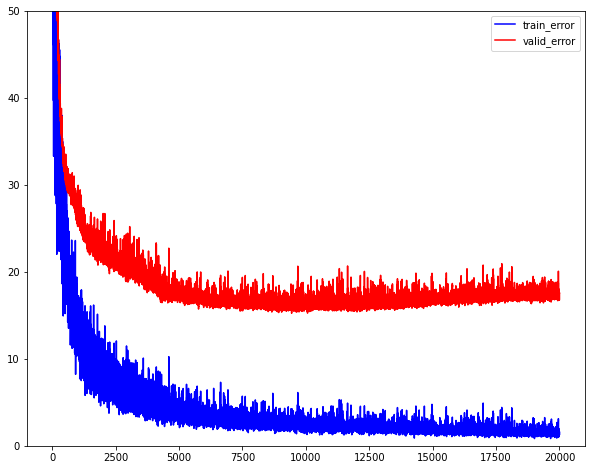

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(loss_train_record, "b", label = "train_error")
plt.plot(loss_valid_record, "r", label = "valid_error")
plt.ylim([0,50])
plt.legend()
plt.show()

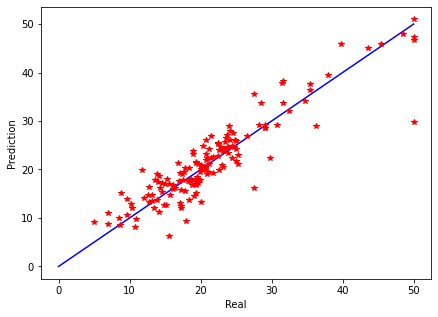

In [ ]:
preds_test = model(x_test)
plt.figure(figsize = (7,5))
x = np.linspace(0,50,1000)
y = x
plt.plot(x,y,"b")
plt.plot(y_test,preds_test.detach(),"*r")
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,preds_test.detach())

0.8255590640961878